In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Bài 1

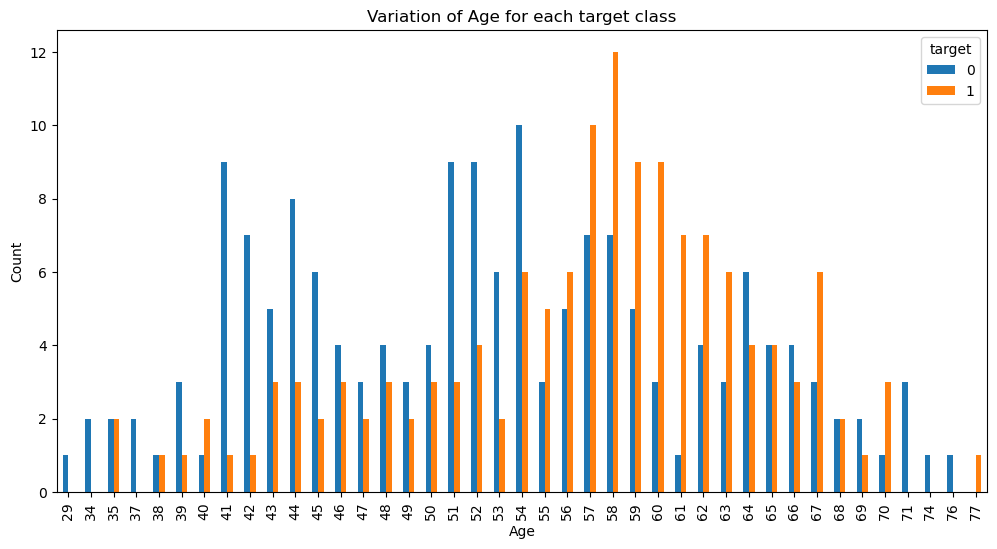

In [65]:
df = pd.read_csv('cleveland.csv', header=None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

age_target_group = df.groupby(['age', 'target']).size().unstack(fill_value=0)
age_target_group.plot(kind='bar', stacked=False, figsize=(12, 6))

plt.title('Variation of Age for each target class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Bài 2

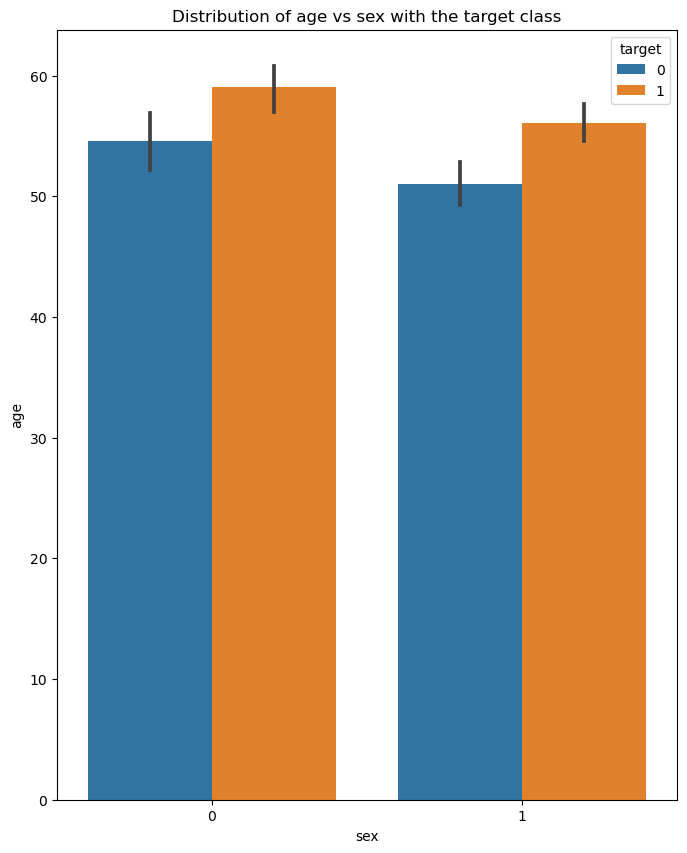

In [66]:
plt.figure(figsize=(8,10))
sns.barplot(x='sex', y='age', hue='target', data=df, errorbar=('ci', 95))
plt.title('Distribution of age vs sex with the target class')
plt.xlabel('sex')
plt.ylabel('age')
plt.show()


### Bài 3

In [67]:
df.fillna(df.mean(), inplace=True)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print (cm_train)
print(cm_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for KNeighborsClassifier = {accuracy_for_test}')


[[107  28]
 [ 31  76]]
[[22  7]
 [12 20]]
Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


### Bài 4

In [68]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = svm.SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
print (cm_train)
print(cm_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


[[107  28]
 [ 31  76]]
[[22  7]
 [12 20]]
Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


### Bài 5

In [69]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print (cm_train)
print(cm_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))


[[122  13]
 [ 24  83]]
[[26  3]
 [ 7 25]]
Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


### Bài 6

In [70]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print (cm_train)
print(cm_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f'Accuracy for training set for Decision Tree = {accuracy_for_train}')
print(f'Accuracy for test set for Decision Tree = {accuracy_for_test}')


[[135   0]
 [  0 107]]
[[23  6]
 [ 8 24]]
Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.77


### Bài 7

In [71]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(criterion='gini', max_depth=10, 
                                   min_samples_split=2, n_estimators=10, 
                                   random_state=42)

rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print (cm_train)
print(cm_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f'Accuracy for training set for Random Forest = {accuracy_for_train}')
print(f'Accuracy for test set for Random Forest = {accuracy_for_test}')


[[133   2]
 [  2 105]]
[[25  4]
 [ 8 24]]
Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


### Bài 8

In [72]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, 
                                     n_estimators=50, 
                                     learning_rate=1.0, 
                                     random_state=42)

adaboost_model.fit(X_train, y_train)

y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print (cm_train)
print(cm_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f'Accuracy for training set for Adaboost = {accuracy_for_train}')
print(f'Accuracy for test set for Adaboost = {accuracy_for_test}')


[[126   9]
 [ 12  95]]
[[26  3]
 [ 7 25]]
Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


### Bài 9

In [73]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(learning_rate=0.1, 
                                       n_estimators=100, 
                                       subsample=1.0, 
                                       min_samples_split=2, 
                                       max_depth=3, 
                                       random_state=42)

gb_model.fit(X_train, y_train)

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print (cm_train)
print(cm_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f'Accuracy for training set for Gradient Boost = {accuracy_for_train}')
print(f'Accuracy for test set for Gradient Boost = {accuracy_for_test}')


[[135   0]
 [  1 106]]
[[25  4]
 [ 5 27]]
Accuracy for training set for Gradient Boost = 1.0
Accuracy for test set for Gradient Boost = 0.85


### Bài 10

In [74]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective="binary:logistic", 
                               random_state=42, 
                               n_estimators=100)

xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print (cm_train)
print(cm_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f'Accuracy for training set for XGboost = {accuracy_for_train}')
print(f'Accuracy for test set for XGboost = {accuracy_for_test}')

[[135   0]
 [  0 107]]
[[26  3]
 [ 5 27]]
Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


### Bài 10

In [75]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(eval_metric='logloss')  # Bỏ qua use_label_encoder
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

estimators = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('svc', svc), ('ad', ad)]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_model.fit(X_train, y_train)

y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print (cm_train)
print(cm_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(f'Accuracy for training set for Stacking = {accuracy_for_train}')
print(f'Accuracy for test set for Stacking = {accuracy_for_test}')


[[135   0]
 [  0 107]]
[[27  2]
 [ 5 27]]
Accuracy for training set for Stacking = 1.0
Accuracy for test set for Stacking = 0.89
